In [1]:
import sys
import configparser as cp
import numpy as np
import scipy.io
import os
import time
import multiprocessing
from driftDiffusionSimulatorBase import driftDiffusionSimulatorBase
from driftDiffusionSimulatorFullCircle import driftDiffusionSimulatorFullCircle
from myGeometryFunctions import *
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
initFile = 'fullCircle_debugData.txt'

Temp = 16
partDensity = 25
probeCenterX = -2.24
probeCenterY= -3.56

constrictionWidth = 0.3
pScatter = 0
sourceDrainRatio = 1.2
Nsteps = 10
dNsave = 1
diameter = 10
injectH, injectW = 1.5, .6

collisionDist = 0.05
stepSize = 0.01

Ncpu = 1
outPath = './'

splitName = initFile.split('.')
if len(splitName) == 2:
    fnameBase = initFile .split('.')[0]
elif len(splitName) == 3:
    fnameBase = '.'.join([initFile .split('.')[0], initFile .split('.')[1]])
elif len(splitName) == 4:
    fnameBase = '.'.join([initFile .split('.')[0], initFile .split('.')[1], initFile .split('.')[2]])
# fnameBaseREDUCED = fnameBase+'_REDUCED'

In [3]:
dSim = driftDiffusionSimulatorFullCircle()
dSim.setDiameter(diameter)
dSim.probeCenterX = probeCenterX
dSim.probeCenterY = probeCenterY
dSim.setConstrictionWidth(constrictionWidth)
dSim.setInjectorShape(injectW,injectH)
dSim.updateScatterProb(pScatter)
dSim.Temp = Temp
dSim.partDensity = partDensity
dSim.setSourceDrainRatio(sourceDrainRatio)
dSim.setOverlapRadius(collisionDist)
dSim.setStepSize(stepSize)

dSim.setEmin(dSim.partDensity, dSim.Temp)
dSim.calcArea()
dSim.setNpart(dSim.partDensity, dSim.Area)
dSim.updateBody()
dSim.addTip()
dSim.updateNparticles()

In [4]:
fnameOut = "./FullCircle_simulation/"+fnameBase+"/"+fnameBase+("_%03d"%0)+".npz"
# fnameOutREDUCED = "./FullCircle_simulation/"+fnameBaseREDUCED+"/"+fnameBaseREDUCED+("_%03d"%0)+".npz"
dSim.runAndSave(Nsteps,dNsave,fnameOut)#,fnameOutREDUCED)


0:  0.0296953
1:  0.031615
2:  0.0271029
3:  0.0253539
4:  0.0278239
5:  0.0255282
6:  0.0263619
7:  0.0266969
8:  0.0317369
9:  0.0263293


(-5.490032312899704, 5.490032312899704, -5.1896240370096836, 5.485220192238557)

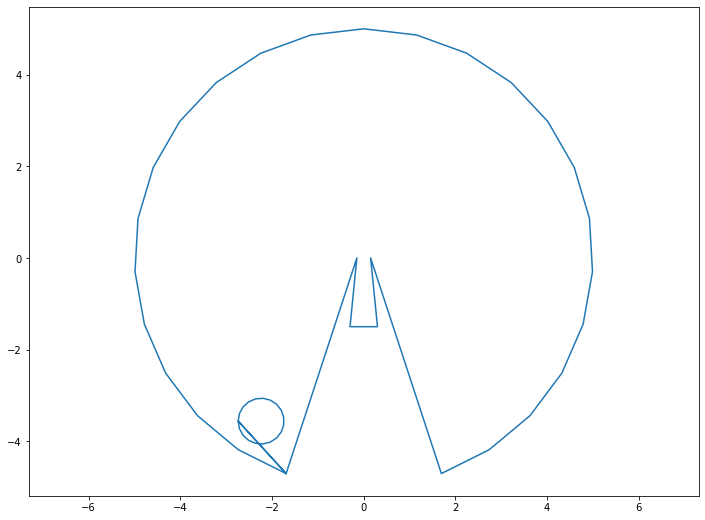

In [6]:
fig, ax = plt.subplots(figsize=[12,9])
ax.plot(dSim.borderX, dSim.borderY)
ax.axis('equal')

In [15]:
print(dSim.Area)
np.pi/2*(5)**2 - np.pi*(.25)**2 + (2.5-.25) + .5

69.86493489159193


41.823558629023054